In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, r2_score,recall_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# Load data

In [2]:
from datetime import datetime

current_time = datetime.now()
# file_name = current_time.strftime("%Y-%m-%d") + '.csv'
file_name = "2020-09-24.csv"
data_dir = '../input/darksky/daily'
today_weather_sheet = pd.read_csv(data_dir + '/' + file_name)
today_weather_sheet.head(10)

,district,formal_name,lat,long,time,summary,icon,sunriseTime,sunsetTime,moonPhase,...,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,Achham,Mangalsen,29.136114,81.250092,2020-09-24 00:00:00,Possible light rain in the morning.,rain,2020-09-24 06:11:00,2020-09-24 18:16:00,0.27,...,15.937,254.5,17.50,2020-09-24 04:39:00,21.21,2020-09-24 18:07:00,18.92,2020-09-24 04:36:00,22.51,2020-09-24 17:44:00
1,Achham,Sugali,29.179807,81.372939,2020-09-24 00:00:00,Rain in the morning.,rain,2020-09-24 06:10:00,2020-09-24 18:15:00,0.27,...,16.093,253.2,15.59,2020-09-24 04:44:00,18.77,2020-09-24 18:39:00,17.23,2020-09-24 04:44:00,20.55,2020-09-24 18:32:00
2,Arghakhanchi,Sandhikharka,27.964022,83.120569,2020-09-24 00:00:00,Heavy rain throughout the day.,rain,2020-09-24 06:03:00,2020-09-24 18:08:00,0.27,...,8.003,250.8,17.04,2020-09-24 08:32:00,19.33,2020-09-24 12:59:00,18.23,2020-09-25 00:00:00,20.63,2020-09-24 13:00:00
3,Arghakhanchi,Sidhara,27.794500,82.828383,2020-09-24 00:00:00,Heavy rain and humid throughout the day.,rain,2020-09-24 06:05:00,2020-09-24 18:09:00,0.27,...,8.666,252.6,20.24,2020-09-24 08:28:00,23.04,2020-09-24 13:25:00,21.81,2020-09-24 03:23:00,24.13,2020-09-24 13:21:00
4,Jhapa,Chnadra Gadhi,26.396167,88.003750,2020-09-24 00:00:00,Rain and humid throughout the day.,rain,2020-09-24 05:44:00,2020-09-24 17:49:00,0.27,...,14.882,254.7,22.94,2020-09-24 04:29:00,26.99,2020-09-24 13:45:00,24.19,2020-09-24 04:27:00,32.43,2020-09-24 13:45:00
5,Jhapa,Gaida (Kankai),26.689722,87.988611,2020-09-24 00:00:00,Rain and humid throughout the day.,rain,2020-09-24 05:44:00,2020-09-24 17:49:00,0.27,...,13.045,254.4,22.86,2020-09-24 04:25:00,28.49,2020-09-24 14:23:00,24.26,2020-09-24 04:20:00,39.97,2020-09-24 15:19:00


In [3]:
crops = pd.read_csv('../input/crops_recommendation.csv')

In [4]:
crops.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [98]:
crops

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

## Data Pre-Processing

In [5]:
# Drop columns with null values
crops = crops.dropna()

In [6]:
today_weather_sheet.columns

Index(['district', 'formal_name', 'lat', 'long', 'time', 'summary', 'icon',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensity',
       'precipIntensityMax', 'precipIntensityMaxTime', 'precipProbability',
       'precipType', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'humidity', 'pressure',
       'windSpeed', 'windGust', 'windGustTime', 'windBearing', 'cloudCover',
       'uvIndex', 'uvIndexTime', 'visibility', 'ozone', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],
      dtype='object')

In [7]:
# select only required fields from today weather
required_fields = ['district', 'formal_name','temperatureMin', 'temperatureMax', 'precipIntensity', 'precipIntensityMax','humidity', 'dewPoint']
weather_data = today_weather_sheet[required_fields]
weather_data.head(10)

,district,formal_name,temperatureMin,temperatureMax,precipIntensity,precipIntensityMax,humidity,dewPoint
0,Achham,Mangalsen,17.50,21.21,0.2563,0.8885,1.00,19.08
1,Achham,Sugali,15.59,18.77,0.3798,1.3815,1.00,17.01
2,Arghakhanchi,Sandhikharka,17.04,19.33,3.7010,7.0719,1.00,18.07
3,Arghakhanchi,Sidhara,20.24,23.04,3.4770,6.7534,1.00,21.60
4,Jhapa,Chnadra Gadhi,22.94,26.99,0.5601,1.4043,0.98,24.66
5,Jhapa,Gaida (Kankai),22.86,28.49,0.6674,1.3561,1.00,25.35


In [8]:
weather_data.iloc[:, 2:]

,temperatureMin,temperatureMax,precipIntensity,precipIntensityMax,humidity,dewPoint
0,17.50,21.21,0.2563,0.8885,1.00,19.08
1,15.59,18.77,0.3798,1.3815,1.00,17.01
2,17.04,19.33,3.7010,7.0719,1.00,18.07
3,20.24,23.04,3.4770,6.7534,1.00,21.60
4,22.94,26.99,0.5601,1.4043,0.98,24.66
5,22.86,28.49,0.6674,1.3561,1.00,25.35


In [9]:
import os
location = "achham"

# weather_data.iloc[:, 2:]
# place_data = weather_data[(weather_data['district'] == 'Jhapa')]
# place_data = weather_data[(weather_data['formal_name'] == 'Gaida (Kankai)')]
weather_data

,district,formal_name,temperatureMin,temperatureMax,precipIntensity,precipIntensityMax,humidity,dewPoint
0,achham,sugali,15.61,27.4,0.1610,0.4926,0.85,18.11
2,achham,mangalsen,17.78,29.6,0.2226,0.5954,0.82,19.65


In [10]:

# select only required fields from today weather
# required_fields = ['district', 'formal_name','temperatureMin', 'temperatureMax', 'precipIntensity', 'precipIntensityMax','humidity', 'dewPoint']
# weather_data = today_weather_sheet[required_fields]
# weather_data.iloc[:, 2:]
# place_data = weather_data[(weather_data['district'] == 'Jhapa')]
# place_data = weather_data[(weather_data['formal_name'] == 'Gaida (Kankai)')]
# place_data

# Exploratory Data Analysis (EDA)

In [11]:
# Convert categorical data to int

# crops['soil_type'] = crops['soil_type'].astype('category')
# category_columns = crops.select_dtypes(['category']).columns
# crops[category_columns] = crops[category_columns].apply(lambda x: x.cat.codes)


# soil_types = crops.soil_type.unique()

# crops.soil_type = pd.Categorical(crops.soil_type).codes

# crops['soil_type'].replace(to_replace=soil_types, value=[], inplace=True)

In [12]:
# soil_types

In [13]:
# crops.soil_type, mapping_index = pd.Series(crops.soil_type).factorize()
# crops

# Model Selection

In [10]:
crops

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
crops.values

array([[90, 42, 43, ..., 6.502985292000001, 202.9355362, 'rice'],
       [85, 58, 41, ..., 7.038096361, 226.6555374, 'rice'],
       [60, 55, 44, ..., 7.840207144, 263.9642476, 'rice'],
       ...,
       [118, 33, 30, ..., 6.362607851, 173.32283859999995, 'coffee'],
       [117, 32, 34, ..., 6.758792552, 127.1752928, 'coffee'],
       [104, 18, 30, ..., 6.779832611000002, 140.9370415, 'coffee']],
      dtype=object)

In [12]:
# X = crops.drop(columns=['crop', 'crop (ne)'])
X_df = crops.drop(columns=['label'])
y_df = crops['label']

In [13]:
X = X_df.values
y = y_df.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
len(X_train)

1540

# without normalization

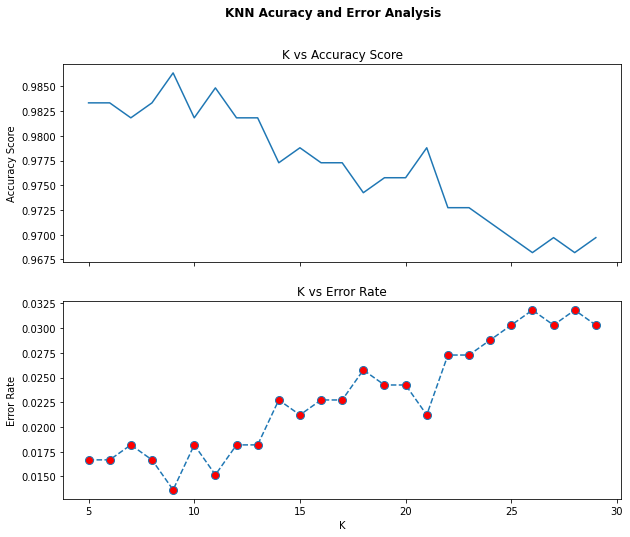

In [16]:
k_list = [*range(5, 30)]
acc_scores = []
error_rate = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc_scores.append(accuracy_score(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='red', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

In [17]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.9833333333333333

### Prediction

In [ ]:
knn.predict()

## With Normallization

In [18]:
# data normalization with sklean
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform train and test data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

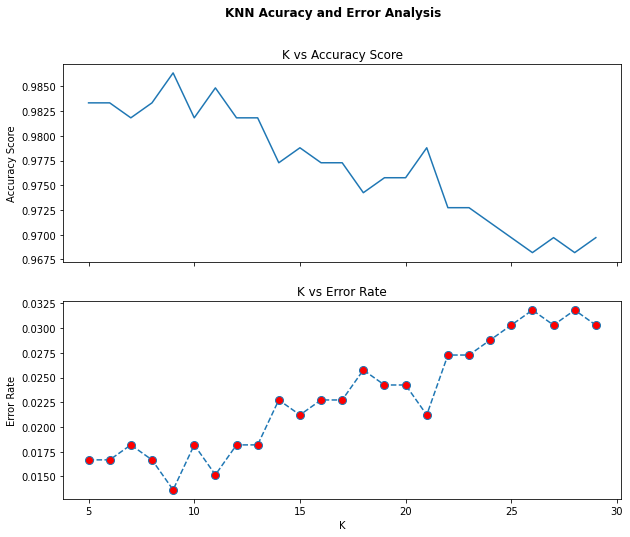

In [23]:
k_list = [*range(5, 30)]
acc_scores = []
error_rate = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc_scores.append(accuracy_score(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='red', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

In [29]:
labels = np.array(list(set(y)))
labels

array(['coffee', 'papaya', 'pigeonpeas', 'watermelon', 'coconut',
       'pomegranate', 'mango', 'muskmelon', 'grapes', 'kidneybeans',
       'rice', 'maize', 'mungbean', 'cotton', 'lentil', 'jute', 'apple',
       'banana', 'chickpea', 'mothbeans', 'orange', 'blackgram'],
      dtype='<U11')

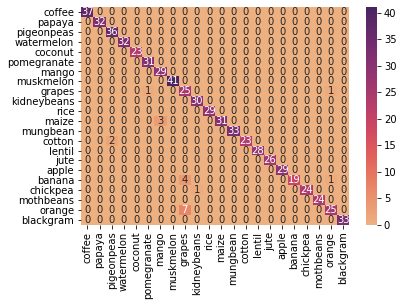

In [22]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels,
           cmap=sns.cm.flare);

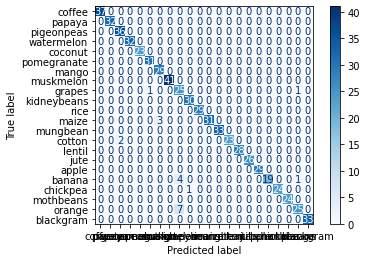

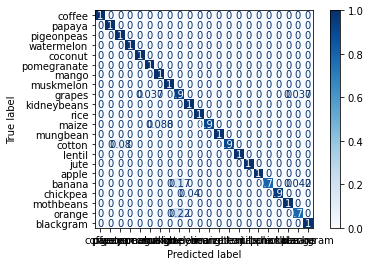

In [32]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn,X_test, y_test,
                                normalize=normalize,
                                display_labels=labels,
                                cmap=plt.cm.Blues)

## Model Selection

In [33]:
models = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]  = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models= models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/home/codemonk/development_tools/pyenv/mlenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.9833333333333333, 'Logistic Regression': 0.9621212121212122}

## KNN From Scratch

In [35]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

def train(X_train, y_train):
    return

def predict(X_train, y_train, X_test, k):
    distances = []
    neighbors = []
    
    for i in range(len(X_train)):
        # Compute and store euclidean distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i]))), i])
        
        # sort the distances
        distances = sorted(distances)
        
    for i in range(k):
        index = distances[i][1]
        neighbors.append(y_train[i])
    return neighbors

def k_nearest_neighbor(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[X] Size of  K must be smaller than of samples data"
    
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i], k))
    
    return np.asanyarray(predictions)

In [39]:
ed = []
for i in range(len(X_test)):
    ed.append(np.array([euclidean_distance(X_test[i], X_t) for X_t in X_train]))
    # distances = [euclidean_distance(X_test[i], X_t) for X_t in X_train]
    # ed.append(distances)

In [43]:
len(ed[0]), len(X_test)

(1540, 660)

In [73]:
from ..ml import *

ImportError: attempted relative import with no known parent package

In [44]:
from collections import Counter
import math

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

class KNNClassifier:
    def __init__(self, k=5, voting_option = mode):
        self.K = k
        self.voting_option = voting_option
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        assert self.K <= len(X_train), "Expected k less than sample size"
        
        predictions = []
        distances = []
        # 1. Iterate over all test data
        for i in range(len(X_test)):
            
            # 2. Calculate Euclidean Distance for each test data
            distances = np.array(np.sqrt(np.sum(np.square(self.X - X_test[i]), axis=1)))
#             distances = np.array([euclidean_distance(X_t, X_test[i]) for X_t in self.X])

            # 3. Sort the distances and get indices of min. distances up to n_neighbors
            sorted_distances_index = distances.argsort()[:self.K]
        
            # 4. Get labels for selected n_neighbors data
            k_nearest_labels = [self.y[index] for index in sorted_distances_index]
            
            # 5. if voting_option = mean (average), then return average of k_labels
            # Else, return mode that is majority voting
            
            predictions.append(self.voting_option(k_nearest_labels))
            
        
        predictions = np.array(predictions)
        
        return predictions
        

In [53]:
class Model:
    def __init__(self):
        self.accuracy_score
        self.error_rate
    
    def cross_validation_split(X, y, n_folds = 1):
        splits = []
        
        if len(X) != len(y):
            raise ValueError("Found different length of Samples: len(X) = {}, len(y)= {}".format(len(X), len(y)))
        fold_size = int(len(X))
        for _ in range(n_folds):
            pass
                
    
    def error_rate(y_true, y_pred):
        return np.mean(y_true != y_pred)
    
    def accuracy_score(y_true, y_pred):
        return np.mean(y_true == y_pred)
    
    def confusion_matrix(y_true, y_pred):
        pass
    
class MinMaxNormalizer:
    def __init(self, data):
        self.data = data
        self.max_data_
        self.min_data_
        
    def fit(self, data):
        self.data = data
        self.max_data_ = data.max(axis=0)
        self.min_data_ = data.min(axis=0)
        
    def minmax(self, data = None):
        if data is None:
            data = self.data
        return [data.min(axis=0), data.max(axis=0)]
    
    def normalize(self, data = None):
        if data is None:
            data = self.data
        return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

## without Normalization

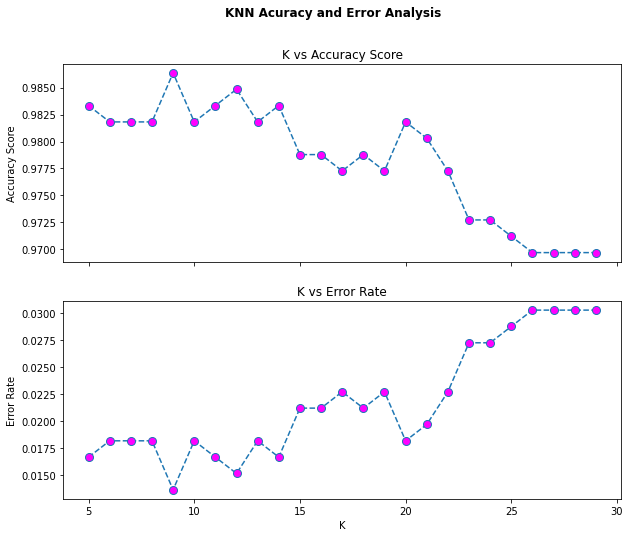

In [45]:
k_list = [*range(5, 30)]
acc_scores = []
error_rate = []
for k in k_list:
    knn = KNNClassifier(k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc_scores.append(accuracy_score(y_test, pred))
    error_rate.append(np.mean(pred != y_test))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

In [58]:
print("Accuracy Score: ")
print("max Accuracy {} at K: {}".format(max(acc_scores), k_list[acc_scores.index(max(acc_scores))]))
print("min {} at K: {}".format(min(acc_scores), k_list[acc_scores.index(min(acc_scores))]))

Accuracy Score: 
max Accuracy 0.9818181818181818 at K: 5
min 0.9636363636363636 at K: 29


In [48]:
clf = KNNClassifier(k=8)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9818181818181818

In [50]:
confusion_matrix(y_test, pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

## with Normalization

In [54]:
normalizer = MinMaxNormalizer()
normalizer.fit(X_train)
X_train_normalize = normalizer.normalize()
X_test_normalize = normalizer.normalize(X_test)

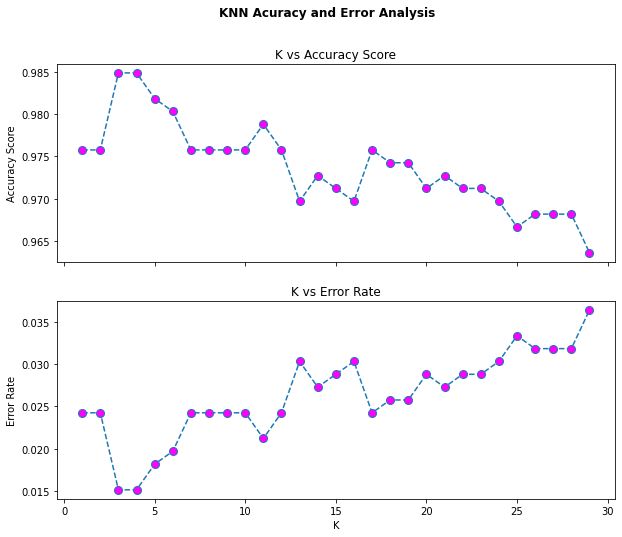

In [64]:
k_list = [*range(1, 30)]
acc_scores = []
error_rate = []
for k in k_list:

    clf = KNNClassifier(k)

    clf.fit(X_train_normalize, y_train)
    pred = clf.predict(X_test_normalize)
    
    acc_scores.append(Model.accuracy_score(y_test, pred))
    error_rate.append(Model.error_rate(y_test, pred))
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 8))
ax1.plot(k_list, acc_scores, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8);

ax1.set(title="K vs Accuracy Score",
        xlabel="",
        ylabel="Accuracy Score")

ax2.plot(k_list, error_rate, linestyle="dashed", marker='o',markerfacecolor='magenta', markersize=8)
ax2.set(title="K vs Error Rate",
       xlabel="K",
       ylabel="Error Rate")


# Title the figure
fig.suptitle('KNN Acuracy and Error Analysis', fontsize=12, fontweight='bold');

In [62]:
print("Accuracy Score: ")
print("max Accuracy {} at K: {}".format(max(acc_scores), k_list[acc_scores.index(max(acc_scores))]))
print("min {} at K: {}".format(min(acc_scores), k_list[acc_scores.index(min(acc_scores))]))

Accuracy Score: 
max Accuracy 0.9818181818181818 at K: 5
min 0.9636363636363636 at K: 29


In [68]:
error_rate[4] + acc_scores[4]

1.0

In [63]:
clf = KNNClassifier(k=5)

clf.fit(X_train_normalize, y_train)
pred = clf.predict(X_test_normalize)

Model.accuracy_score(y_test, pred), Model.error_rate(y_test, pred)

(0.9818181818181818, 0.01818181818181818)

### predictions

In [78]:
crops.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [90]:
x_features = np.array([3, 4,5, 44, 66, 10, 300], dtype=float)

# Normalize
normalizer = MinMaxNormalizer()
normalizer.fit(x_features)
x_features_normalize = normalizer.normalize()

pred = clf.predict(x_features_normalize)

print(pred)
set(pred)

['kidneybeans' 'kidneybeans' 'kidneybeans' 'kidneybeans' 'kidneybeans'
 'kidneybeans' 'papaya']


{'kidneybeans', 'papaya'}

In [92]:
x_features_normalize.size

7